In [111]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [112]:
from google.colab import files

In [113]:
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [114]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "diabetes.csv" with length 23873 bytes


In [115]:
import io

In [116]:
pima = pd.read_csv(io.StringIO(uploaded['diabetes.csv'].decode('utf-8')))

In [117]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [118]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction','SkinThickness']
X = pima[feature_cols]
y = pima.Outcome

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [128]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf = clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [129]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.7575757575757576


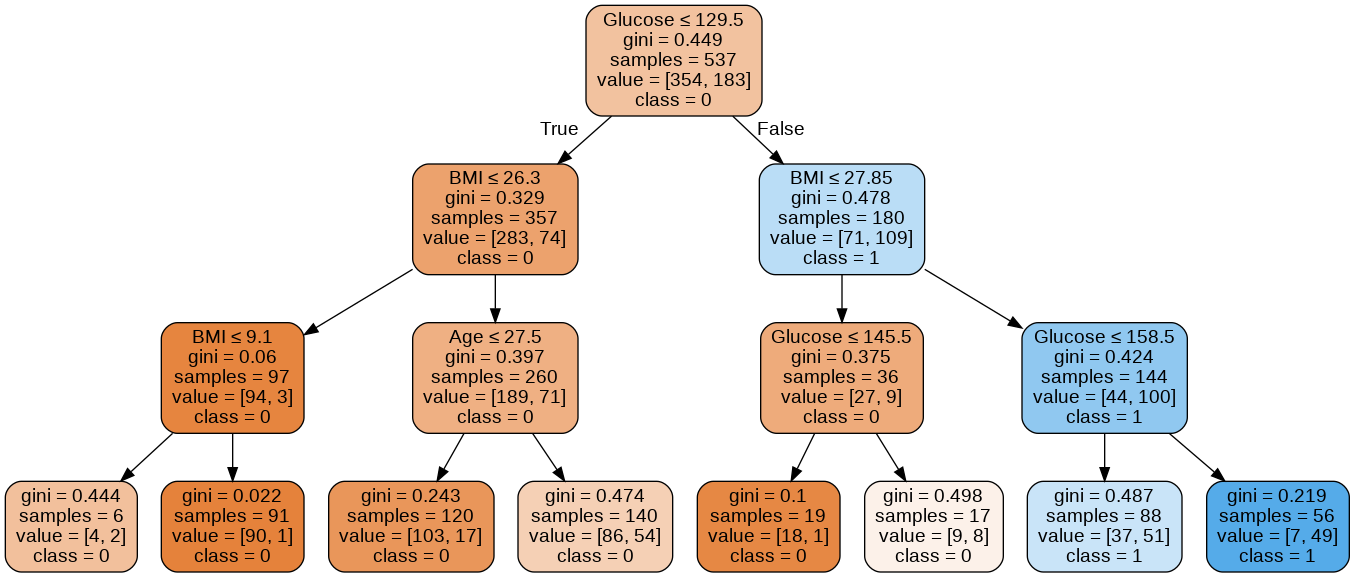

In [130]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTreeWithPruning.png')
Image(graph.create_png())